In [1]:
%cd "/content/drive/MyDrive/autoencoder"

/content/drive/MyDrive/autoencoder


In [2]:
%pwd

'/content/drive/MyDrive/autoencoder'

In [3]:
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Dense ,Conv2D, MaxPooling2D, Input, Flatten 
from tensorflow.keras.layers import  UpSampling2D, Reshape ,Activation
from tensorflow.keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt

In [4]:
#data dowland 
(real_x_train, _) , (real_x_test, __) = cifar10.load_data()

170500096/170498071 [==============================] - 5s 0us/step


In [5]:
x_train = real_x_train
x_test = real_x_test
print("x train shape :",x_train.shape)
print("x test shape :",x_test.shape)

x train shape : (50000, 32, 32, 3)
x test shape : (10000, 32, 32, 3)


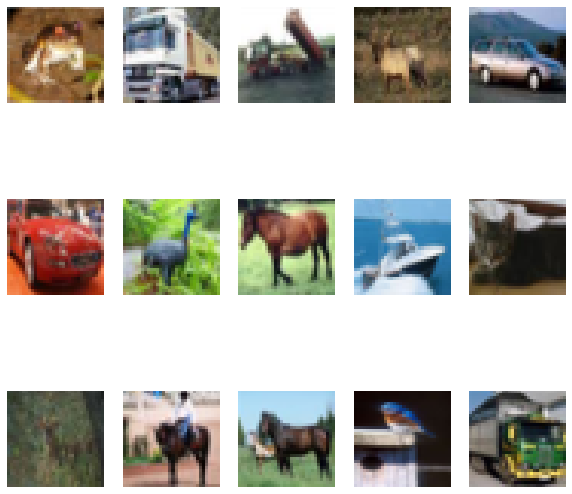

In [6]:
#visualize
plt.figure(figsize = (10,10))
for  i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(x_train[i])
    plt.axis("off")
plt.show()   

In [7]:
#preprocesing
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = x_train.reshape(len(x_train), 32, 32, 3)
x_test = x_test.reshape(len(x_test), 32, 32, 3)
print("x train shape :",x_train.shape)
print("x test shape :",x_test.shape)

x train shape : (50000, 32, 32, 3)
x test shape : (10000, 32, 32, 3)


In [8]:
#model encoder
input_img_size_encoder = Input(shape =(32, 32, 3))

x = Conv2D(64 , (3,3) , padding = "same")(input_img_size_encoder)
x = Activation("relu")(x)
x = MaxPooling2D((2,2), padding = "same")(x)

x = Conv2D(32 , (3,3), padding = "same")(x)
x = Activation("relu")(x)
x = MaxPooling2D((2,2) ,padding = "same")(x)

x = Conv2D(16, (3,3), padding = "same")(x)
x = Activation("relu")(x)
x = MaxPooling2D((2,2), padding = "same")(x)

x = Flatten()(x)
encoded = Dense(4*4*16)(x) #latent space

In [9]:
#model decoder
x = Reshape((4,4,16) , input_shape = (4*4*16,))(encoded)#latent space
x = UpSampling2D((2,2))(x)# 8,8,16
x = Conv2D(16 , (3,3) , padding = "same" , activation = "relu")(x)

x = UpSampling2D((2,2))(x) # 16,16,32
x = Conv2D(32 , (3,3) , padding = "same" , activation = "relu")(x)

x = UpSampling2D((2,2))(x) # 32,32,64                 
x = Conv2D(64 , (3,3) , padding = "same" , activation = "relu")(x) 

decoded = Conv2D(3 , (3,3) , padding = "same" , activation = "sigmoid")(x) 

In [12]:
#model encoder and autoencoder
encoder = Model(input_img_size_encoder , encoded, name = "encoder")
autoencoder = Model(input_img_size_encoder , decoded, name = "autoencoder")
autoencoder.compile(loss = "binary_crossentropy" , optimizer = "adam")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          

In [13]:
#train
hist = autoencoder.fit(x_train, x_train,
                      epochs = 200,
                      batch_size = 128,
                      shuffle=True,
                      validation_data=(x_test, x_test))

autoencoder.save_weights("autoencoder_weights.h5")
encoder.save_weights("encoder_weights.h5")

Epoch 1/200
391/391 [==============================] - 8s 18ms/step - loss: 0.5661 - val_loss: 0.5634
Epoch 2/200
391/391 [==============================] - 7s 17ms/step - loss: 0.5624 - val_loss: 0.5633
Epoch 3/200
391/391 [==============================] - 7s 18ms/step - loss: 0.5625 - val_loss: 0.5634
Epoch 4/200
391/391 [==============================] - 7s 18ms/step - loss: 0.5625 - val_loss: 0.5635
Epoch 5/200
391/391 [==============================] - 7s 18ms/step - loss: 0.5625 - val_loss: 0.5635
Epoch 6/200
391/391 [==============================] - 7s 17ms/step - loss: 0.5624 - val_loss: 0.5633
Epoch 7/200
391/391 [==============================] - 7s 18ms/step - loss: 0.5625 - val_loss: 0.5634
Epoch 8/200
391/391 [==============================] - 7s 18ms/step - loss: 0.5625 - val_loss: 0.5646
Epoch 9/200
391/391 [==============================] - 7s 17ms/step - loss: 0.5624 - val_loss: 0.5638
Epoch 10/200
391/391 [==============================] - 7s 18ms/step - loss: 0.562